In [1]:
import pandas as pd
import numpy as np
import pickle
import sys
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [2]:
datapath = sys.path[0] + '/wafer-map-hw2/train_set.pkl'

with open(datapath, "rb") as file:
    df = pickle.load(file)
    
print("Original columns: ", df.columns)
print(datapath)

Original columns:  Index(['waferMap', 'dieSize', 'lotName', 'waferIndex', 'trianTestLabel',
       'failureType', 'wafer_size', 'failureNum'],
      dtype='object')
C:\Users\alexc\OneDrive\Documents\Taiwan Classes\Second Semester\Introduction to Artificial Intelligence\Kaggle\HW2/wafer-map-hw2/train_set.pkl


In [3]:
df = df[["waferMap","failureType","wafer_size","failureNum"]]

In [4]:
df.head()

,waferMap,failureType,wafer_size,failureNum
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",none,"(45, 48)",8
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",none,"(45, 48)",8
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",none,"(45, 48)",8
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",none,"(45, 48)",8
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",none,"(45, 48)",8


In [5]:
#mapping_traintest = {'Training': 0, 'Test': 1}
mapping_type = {'Center':0, 'Donut':1, 'Edge-Loc':2, 'Edge-Ring':3,
         'Loc':4, 'Random':5, 'Scratch':6, 'Near-full':7, 'none':8}

In [6]:
pd.set_option('display.max_rows', 50)

df['wafer_size'].value_counts()

(25, 27)      15684
(27, 25)       9235
(26, 26)       6369
(38, 36)       1877
(33, 37)       1804
              ...  
(63, 75)          1
(50, 68)          1
(15, 3)           1
(122, 102)        1
(59, 55)          1
Name: wafer_size, Length: 335, dtype: int64

In [7]:
img_size = 60

def resizemap(waferMap):
    return cv2.resize(waferMap,(img_size,img_size))

df["resized_waferMap"] = df.waferMap.apply(resizemap)

In [8]:
df.sort_values(by = "wafer_size")

,waferMap,failureType,wafer_size,failureNum,resized_waferMap
109448,"[[0, 1, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...",none,"(15, 3)",8,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
10894,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Edge-Loc,"(22, 35)",2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
9630,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Center,"(22, 35)",0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
20786,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Edge-Loc,"(22, 50)",2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
21631,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Edge-Loc,"(22, 50)",2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...,...,...
12696,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Center,"(212, 84)",0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
10870,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Scratch,"(212, 84)",6,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
10421,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Loc,"(212, 84)",4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
12697,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Scratch,"(212, 84)",6,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [9]:
#for i,img in enumerate(df.resized_waferMap):   
    #plt.imsave(sys.path[0]+"\images"+"\wafermap_"+str(i)+".png", img)
    
    ##Show images: Don't show all of them
    ##plt.imshow(img)
    ##plt.show()

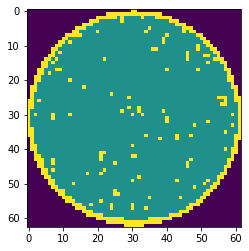

In [10]:
#Plot Original Image
img = df["waferMap"][12359]
plt.imshow(img,)# cmap = "gray")
plt.show()

In [11]:
df.resized_waferMap[0].shape

(60, 60)

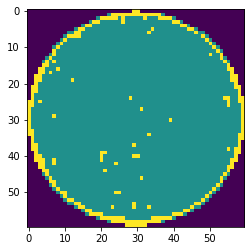

In [12]:
#Plot Normalized Image
img = df["resized_waferMap"][12359]
plt.imshow(img,)# cmap = "gray")
plt.show()

In [13]:
#%%time
#scale the image


#def normalizing(wafer_map):
    #return tf.keras.utils.normalize(wafer_map)

#df['resized_waferMap'] = df['resized_waferMap'].apply(normalizing)

In [14]:
from sklearn.utils import shuffle

#random shuffle the df
df = shuffle(df)
df

,waferMap,failureType,wafer_size,failureNum,resized_waferMap
7970,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,...",Edge-Ring,"(38, 36)",3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
78728,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2,...",none,"(25, 27)",8,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
70738,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2,...",none,"(25, 27)",8,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
20685,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Scratch,"(116, 146)",6,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
8189,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2,...",Random,"(29, 30)",5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...,...,...
21550,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Loc,"(45, 43)",4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
73654,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,...",none,"(25, 27)",8,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
115708,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0,...",none,"(27, 25)",8,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
71513,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2,...",none,"(25, 27)",8,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [15]:
df.head()

,waferMap,failureType,wafer_size,failureNum,resized_waferMap
7970,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,...",Edge-Ring,"(38, 36)",3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
78728,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2,...",none,"(25, 27)",8,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
70738,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2,...",none,"(25, 27)",8,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
20685,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Scratch,"(116, 146)",6,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
8189,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2,...",Random,"(29, 30)",5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


### Maybe Balance in the future, data is too unbalanced 

In [16]:
df.failureNum.value_counts()

8    36730
3     8554
0     3462
2     2417
4     1620
5      609
6      500
1      409
7       54
Name: failureNum, dtype: int64

### Transform/Resizing Array 

In [17]:
x = np.array(df.resized_waferMap)
y = np.array(df.failureNum)

In [18]:
x

array([array([[0, 0, 0, ..., 0, 0, 0],
              [0, 0, 0, ..., 0, 0, 0],
              [0, 0, 0, ..., 0, 0, 0],
              ...,
              [0, 0, 0, ..., 0, 0, 0],
              [0, 0, 0, ..., 0, 0, 0],
              [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
       array([[0, 0, 0, ..., 0, 0, 0],
              [0, 0, 0, ..., 0, 0, 0],
              [0, 0, 0, ..., 0, 0, 0],
              ...,
              [0, 0, 0, ..., 0, 0, 0],
              [0, 0, 0, ..., 0, 0, 0],
              [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
       array([[0, 0, 0, ..., 0, 0, 0],
              [0, 0, 0, ..., 0, 0, 0],
              [0, 0, 0, ..., 0, 0, 0],
              ...,
              [0, 0, 0, ..., 0, 0, 0],
              [0, 0, 0, ..., 0, 0, 0],
              [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), ...,
       array([[0, 0, 0, ..., 0, 0, 0],
              [0, 0, 0, ..., 0, 0, 0],
              [0, 0, 0, ..., 0, 0, 0],
              ...,
              [0, 0, 0, ..., 0, 0, 0],
              [0

In [19]:
x[0].shape, y.shape

((60, 60), (54355,))

In [20]:
inputs = []

for element in x:
    inputs.append(element.reshape(-1,img_size,img_size))

In [21]:
inputs = np.squeeze(inputs, axis=(1,))

In [22]:
#inputs = []
#for element in x:
#    inputs.append(element)
    
#inputs = np.array(inputs)

#y = np.array(y)

In [23]:
np.set_printoptions(threshold=10)
inputs

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

### Importing to pickle

In [24]:
import pickle

pickle_out = open("x.pickle","wb")
pickle.dump(inputs, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

# -------------------------------------------------- 

## Testing Data and Preprocessing it

In [25]:
datapath = sys.path[0] + '/wafer-map-hw2/test_set_all.pkl'

with open(datapath, "rb") as file:
    test = pickle.load(file)
    
print("Original columns: ", test.columns)

Original columns:  Index(['waferMap', 'dieSize', 'lotName', 'waferIndex', 'trianTestLabel',
       'wafer_size'],
      dtype='object')


In [26]:
test.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,wafer_size
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2,...",533.0,lot40328,1.0,1,"(26, 26)"
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,...",533.0,lot40328,2.0,1,"(26, 26)"
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2,...",533.0,lot40328,3.0,1,"(26, 26)"
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2,...",533.0,lot40328,4.0,1,"(26, 26)"
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1,...",533.0,lot40328,5.0,1,"(26, 26)"


In [27]:
test['wafer_size'].value_counts()

(30, 34)    12291
(29, 26)    11708
(39, 37)    10104
(33, 29)     8062
(26, 26)     7997
            ...  
(24, 18)        1
(18, 44)        1
(53, 71)        1
(18, 4)         1
(24, 13)        1
Name: wafer_size, Length: 51, dtype: int64

In [28]:
test["resized_waferMap"] = test.waferMap.apply(resizemap)

In [29]:
#for i,img in enumerate(test.resized_waferMap):
    #imagepath = sys.path[0]+"\images"+"\wafermap_"+str(i)+".png"
    #cv2.imwrite(imagepath, img)
    
#    plt.imsave(sys.path[0]+"\images_test"+"\wafermap_"+str(i)+".png", img)

In [30]:
#%%time

#test['resized_waferMap'] = test['resized_waferMap'].apply(normalizing)

In [31]:
test.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,wafer_size,resized_waferMap
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2,...",533.0,lot40328,1.0,1,"(26, 26)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,...",533.0,lot40328,2.0,1,"(26, 26)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2,...",533.0,lot40328,3.0,1,"(26, 26)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2,...",533.0,lot40328,4.0,1,"(26, 26)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1,...",533.0,lot40328,5.0,1,"(26, 26)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [32]:
#Transform and resize the inputs
x_testing = np.array(test.resized_waferMap)

In [33]:
inputs_testing = []
for element in x_testing:
    inputs_testing.append(element.reshape(-1,img_size,img_size))

In [34]:
inputs_testing = np.squeeze(inputs_testing, axis=(1,))

In [35]:
#inputs_testing = []

#for element in x_testing:
#    inputs_testing.append(element)
    
#inputs_testing = np.array(inputs_testing)

In [36]:
np.set_printoptions(threshold=sys.maxsize)
inputs_testing[0:1]

array([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
         1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 0, 0, 0, 

In [37]:
inputs_testing.shape

(118595, 60, 60)

In [38]:
pickle_out = open("x_to_predict.pickle","wb")
pickle.dump(inputs_testing, pickle_out)
pickle_out.close()

In [39]:
np.set_printoptions(threshold= 10)
inputs_testing

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

# -------------------------------------------------- END --------------------------------------------------